## Question 3


Global Stiffness Matrix 2:
 [[ 1244.  1867. -1244.  1867.     0.     0.     0.]
 [ 1867.  3733. -1867.  1867.     0.     0.     0.]
 [-1244. -1867.  7488.     0. -1244.  1867. -5000.]
 [ 1867.  1867.     0.  7466. -1867.  1867.     0.]
 [    0.     0. -1244. -1867.  1244. -1867.     0.]
 [    0.     0.  1867.  1867. -1867.  3733.     0.]
 [    0.     0. -5000.     0.     0.     0.  5000.]]
Deformations:
 [[ 0.        ]
 [ 0.        ]
 [-0.00155744]
 [-0.00022263]
 [ 0.        ]
 [ 0.00089027]
 [ 0.        ]]
Reactions:
 [[ 1.52181367e+00]
 [ 2.49210146e+00]
 [-1.00000000e+01]
 [ 0.00000000e+00]
 [ 6.90964839e-01]
 [ 8.88178420e-16]
 [ 7.78722150e+00]]
SF & BM Value for element 1: 
 [[ 1.52181367]
 [ 2.49210146]
 [-1.52181367]
 [ 2.07667705]]


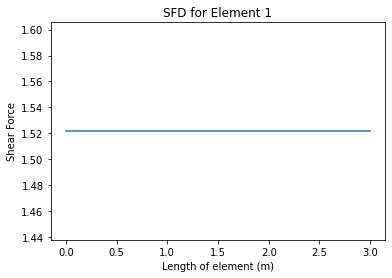

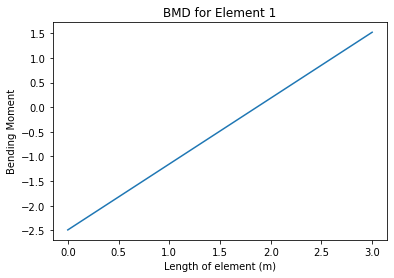

SF & BM Value for element 2: 
 [[-6.90964839e-01]
 [-2.07667705e+00]
 [ 6.90964839e-01]
 [ 8.88178420e-16]]


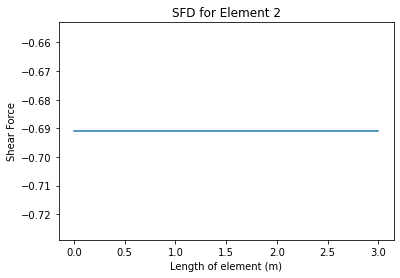

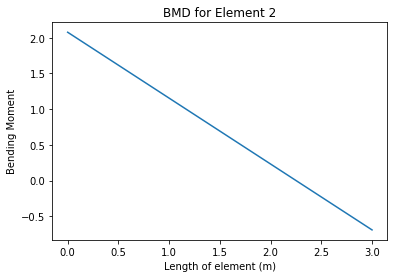

In [5]:
import numpy as np
import matplotlib.pyplot as plt

E=70000000
I=40*10**-6
k=5000
P=10
L=[3,3]
number_of_nodes = 3
u = [0,0,1,1,0,1,0]
F = np.array([-P,0,0]).reshape((3,1))

Global_stiffness_Matrix = np.zeros((2*number_of_nodes,2*number_of_nodes))
k_matrix={}
for j in range(len(L)):
  Element_stifness=np.array([[12,6*L[j],-12, 6*L[j]],[6*L[j], 4*L[j]**2, -6*L[j], 2*L[j]**2],[-12, -6*L[j], 12, -6*L[j]],[6*L[j],2*L[j]**2, -6 *L[j], 4*L[j]**2]])
  k_matrix[j] = np.round((E*I/(L[j]**3)) * Element_stifness,0)
  

for i in range(len(L)):
  Global_stiffness_Matrix[i+i:i+i+4, i+i:i+i+4] += k_matrix[i]
# convert GSM to 7x7
row_to_add = np.array([0,0,0,0,0,0])
col_to_add = np.array([0,0,0,0,0,0,0])
Global_stiffness_Matrix = np.vstack((Global_stiffness_Matrix, row_to_add))
Global_stiffness_Matrix = np.hstack((Global_stiffness_Matrix, np.atleast_2d(col_to_add).T))
# Spring Matrix
k_spring = np.array([k,-k,-k,k]).reshape((2,2))

Global_stiffness_Matrix[2,2] += k_spring[0,0]
Global_stiffness_Matrix[2,6] += k_spring[0,1]
Global_stiffness_Matrix[6,2] += k_spring[1,0]
Global_stiffness_Matrix[6,6] += k_spring[1,1]
print("Global Stiffness Matrix 2:\n",Global_stiffness_Matrix)

count = 0
for i in u:
  if i==1:
    count+=1

reduced_m = []
for i in range(2*number_of_nodes+1):
  for j in range(2*number_of_nodes+1):
    if u[i]*u[j] == 1:
      reduced_m.append(Global_stiffness_Matrix[i][j])
reduced_m = np.array(reduced_m).reshape((count,count))
rotation_m = np.linalg.solve(reduced_m, F)
a=0
b=0
disp_m=[]
for i in u:
  if i == 1:
    disp_m.append(rotation_m[a][0])
    a+=1
  else:
    disp_m.append(u[b])
  b+=1
disp_m = np.array(disp_m).reshape((2*number_of_nodes+1,1))
print("Deformations:\n",disp_m)
reactions=np.matmul(Global_stiffness_Matrix, disp_m)
print("Reactions:\n",reactions)

for i in range(len(L)):
  force_mat = np.matmul(k_matrix[i],disp_m[i+i:i+i+4])
  print('SF & BM Value for element ' + str(i+1) +': \n', force_mat)
  #xValue=[0,L[i]]
  #yValue=[force_mat[0],force_mat[0]]
  plt.figure()
  plt.title('SFD for Element '+str(i+1))
  plt.plot([0,L[i]],[force_mat[0],force_mat[0]])
  plt.xlabel("Length of element (m)")
  plt.ylabel("Shear Force")
  plt.savefig('SFD for Element '+str(i+1)+'.png')
  plt.figure()
  plt.title('BMD for Element '+str(i+1))
  plt.plot([0,L[i]],[-1*force_mat[1],-1*force_mat[2]])
  plt.xlabel("Length of element (m)")
  plt.ylabel("Bending Moment")
  plt.savefig('BMD for Element '+str(i+1)+'.png')
  plt.show()